In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv("C:/Users/kisho/Datasets/guvi_courses.csv")

In [67]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [68]:
df.shape

(3680, 12)

In [69]:
df.dtypes

course_id              float64
course_title            object
url                     object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [70]:
df['year'] = pd.to_datetime(df['published_timestamp']).dt.year
df['month'] = pd.to_datetime(df['published_timestamp']).dt.month
df['day'] = pd.to_datetime(df['published_timestamp']).dt.day

In [71]:
df.drop(['course_id','course_title','url','published_timestamp'],axis = 1,inplace=True)

In [72]:
df.isna().sum()

price               4
num_subscribers     4
num_reviews         4
num_lectures        4
level               4
Rating              4
content_duration    4
subject             3
year                4
month               4
day                 4
dtype: int64

In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(3676, 11)

In [75]:
df.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'Rating', 'content_duration', 'subject', 'year', 'month', 'day'],
      dtype='object')

In [76]:
df[['year','month','day']] = df[['year','month','day']].astype(int)

In [77]:
df.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,year,month,day
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development,2013,2,14
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development,2013,6,9
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development,2015,11,2
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development,2014,4,8
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,Subject: Web Development,2016,3,8


In [78]:
df.shape

(3676, 11)

# filling the 0 values with median

In [79]:
num_cols = [col for col in df.columns if df[col].dtype!='object']
cat_cols = [col for col in df.columns if df[col].dtype=='object']

In [80]:
df[df.num_subscribers == 0]

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,year,month,day
2360,35.0,0.0,0.0,12.0,Beginner Level,0.40,0.733333,Business Finance,2017,5,23
2361,95.0,0.0,0.0,5.0,All Levels,0.94,1.000000,Business Finance,2017,7,5
2362,50.0,0.0,0.0,9.0,All Levels,0.78,1.500000,Business Finance,2017,6,28
2363,40.0,0.0,0.0,35.0,All Levels,0.18,5.500000,Business Finance,2017,7,2
2364,20.0,0.0,0.0,10.0,Beginner Level,0.37,2.500000,Business Finance,2017,4,24
...,...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2017,6,30
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,2017,3,10
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2017,5,22
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,2017,5,30


In [81]:
for col in num_cols:
    df[col] = df[col].apply(lambda x: df[col].median() if x == 0 else x)

In [82]:
df.dropna(inplace=True)

In [83]:
df.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,year,month,day
0,45.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development,2013,2,14
1,45.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development,2013,6,9
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development,2015,11,2
3,45.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development,2014,4,8
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,Subject: Web Development,2016,3,8


In [84]:
df.shape

(3676, 11)

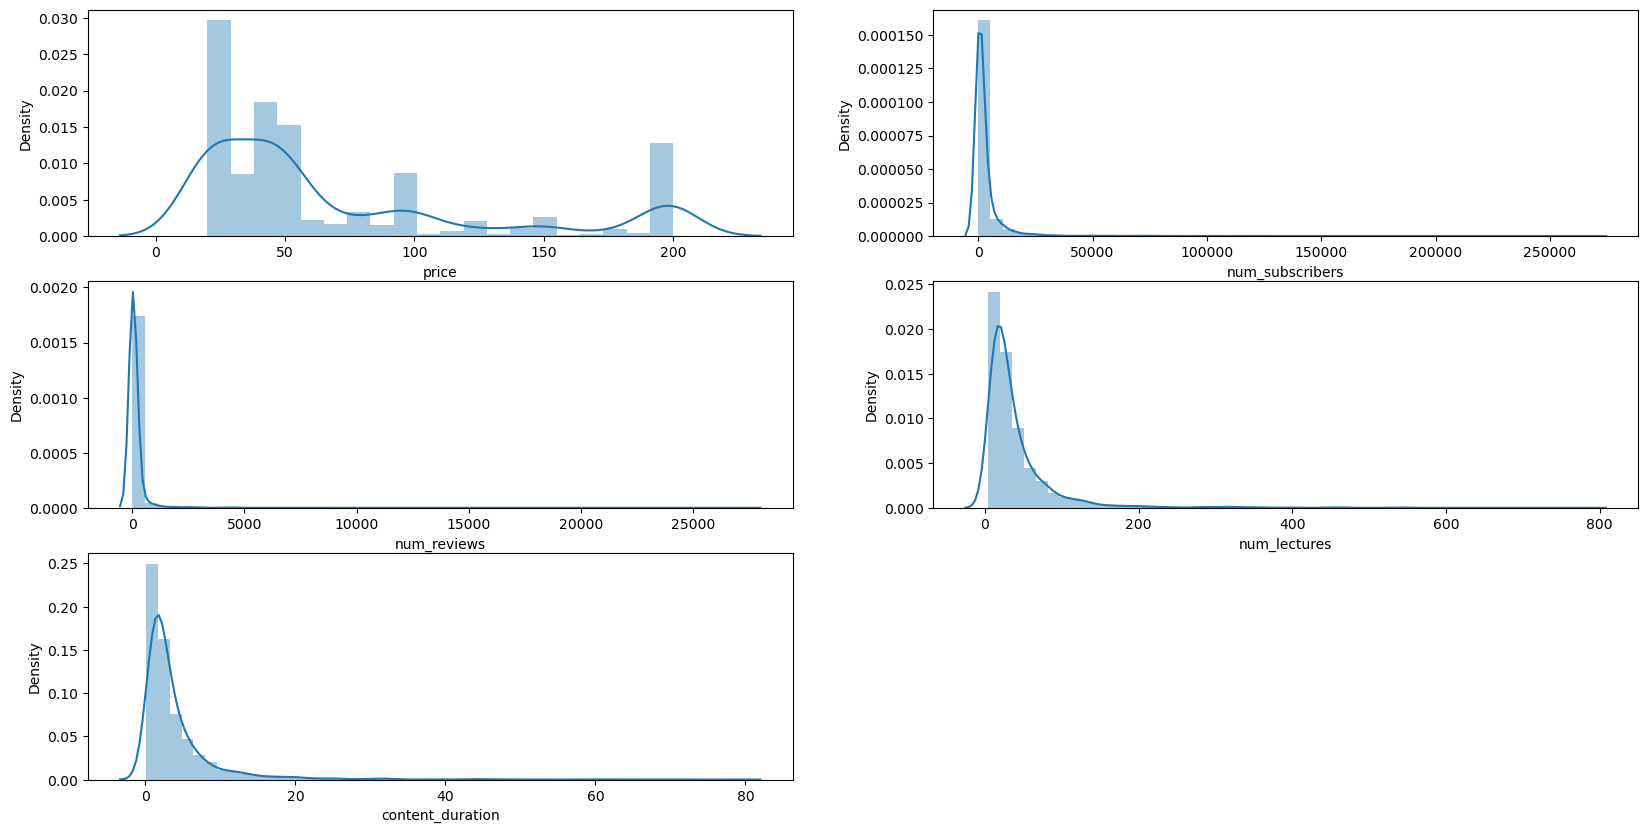

In [85]:
plt.figure(figsize=(20,10))
cols =['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.distplot(df[col])

In [86]:
skewed = ['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
for i in skewed:
    df[i] = np.log(df[i])

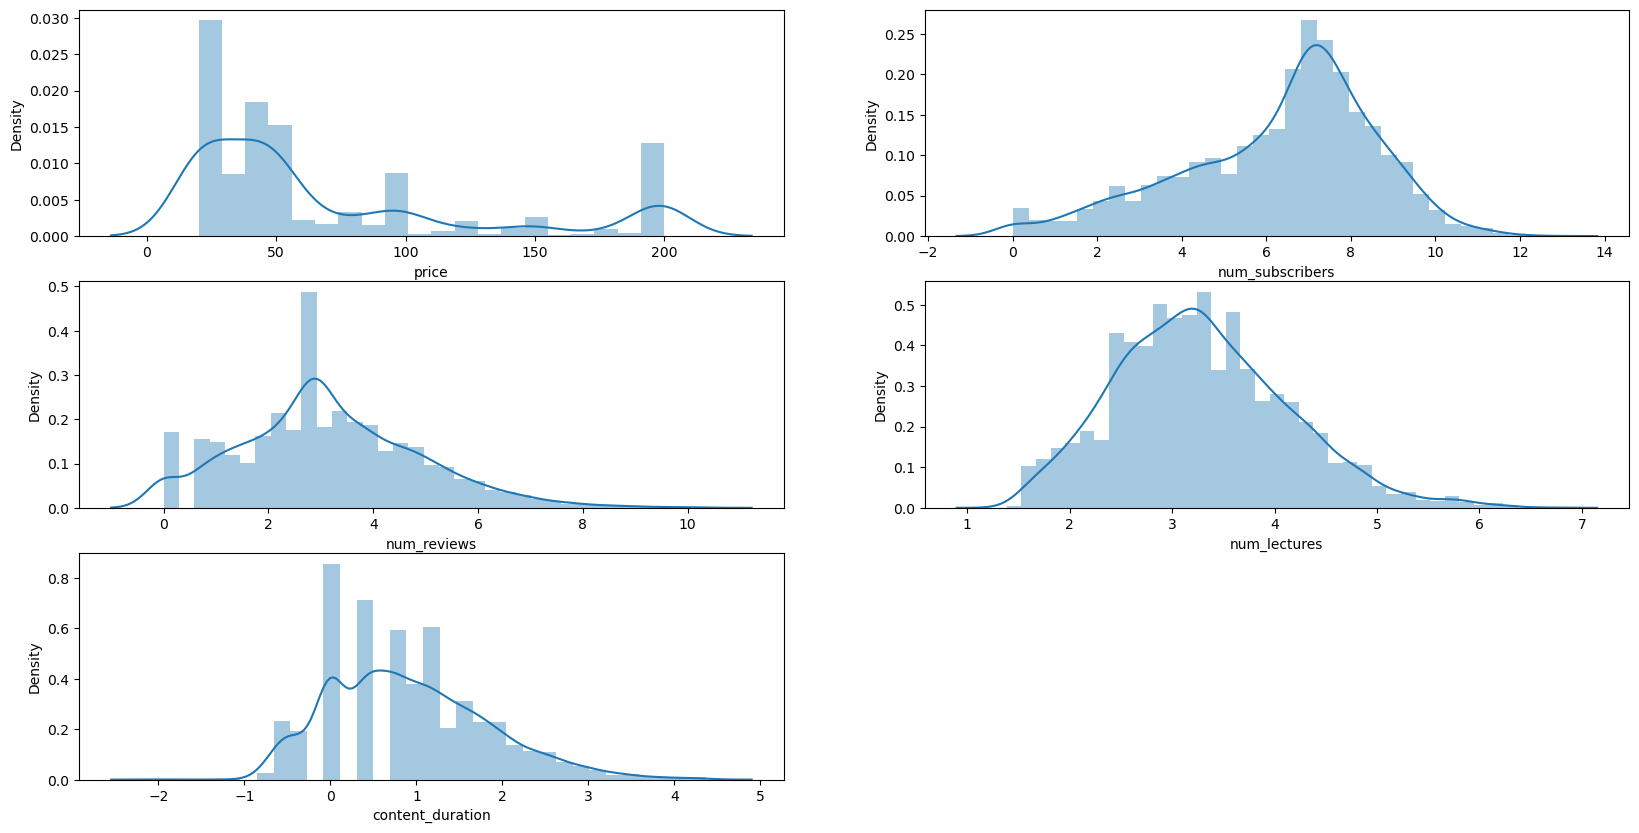

In [87]:
plt.figure(figsize=(20,10))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.distplot(df[col])

In [88]:
for i in cols:
    q1,q2,q3 = np.quantile(df[i],[0.25,0.5,0.75])
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    o = df[(df[i] <lower) | (df[i]>upper)].shape[0]
    print(q1,q2,q3)
    print(f'the no.of outliers in {i} are {o}')

25.0 45.0 95.0
the no.of outliers in price are 0
4.8959671320186215 6.816461983025807 7.846980982138788
the no.of outliers in num_subscribers are 50
1.9459101490553132 2.8903717578961645 4.204692619390966
the no.of outliers in num_reviews are 43
2.70805020110221 3.2188758248682006 3.828641396489095
the no.of outliers in num_lectures are 44
0.0 0.6931471805599453 1.5040773967762742
the no.of outliers in content_duration are 20


In [90]:
def outliers(col):
    q1,q2,q3 = np.quantile(df[i],[0.25,0.5,0.75])
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    df[col] = df[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))


In [91]:
for i in cols:
    outliers(i)

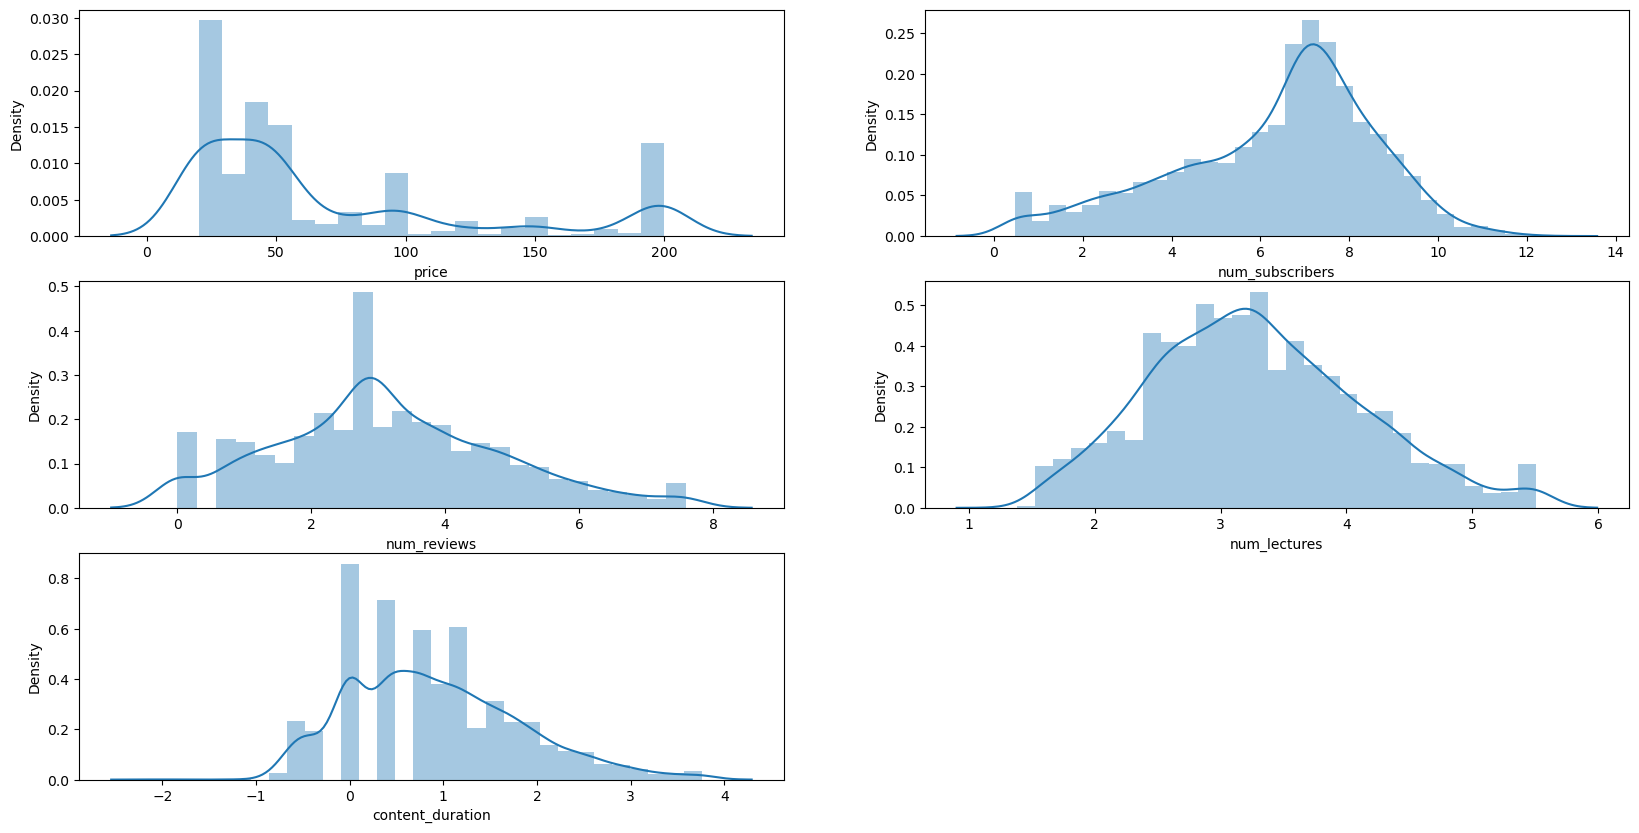

In [92]:
plt.figure(figsize=(20,10))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.distplot(df[col])

In [93]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: level, dtype: int64

In [94]:
df['subject'].value_counts()

Subject: Web Development    1203
Business Finance            1191
Musical Instruments          680
Graphic Design               602
Name: subject, dtype: int64

In [95]:
df['subject'] = df['subject'].apply(lambda x: x.replace('Subject: ',''))

<Axes: xlabel='level', ylabel='count'>

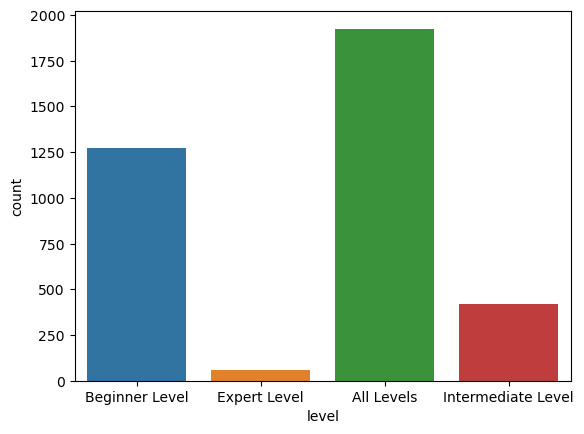

In [96]:
sns.countplot(data=df,x='level')

<Axes: xlabel='subject', ylabel='count'>

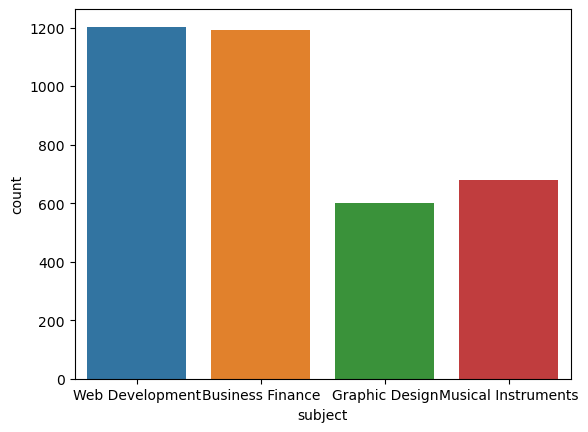

In [97]:
sns.countplot(data=df,x='subject')

<Axes: >

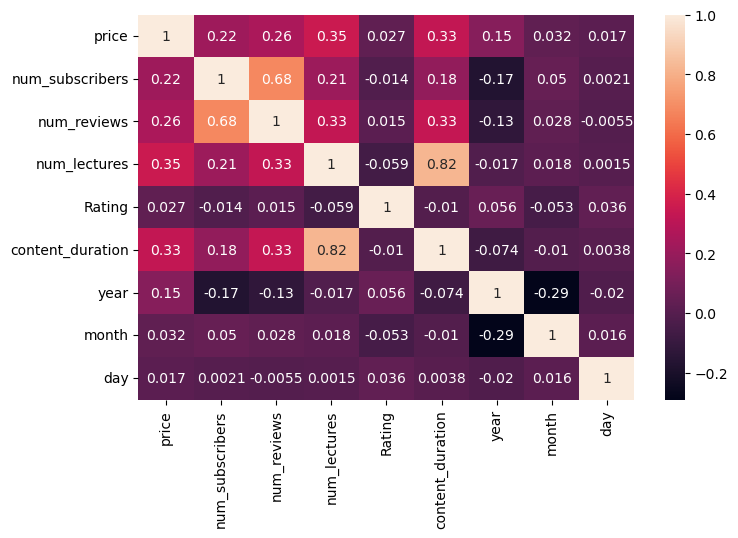

In [98]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [99]:
data = df.drop(['num_lectures','num_subscribers'],axis=1)

In [100]:
data.head()

,price,num_reviews,level,Rating,content_duration,subject,year,month,day
0,45.0,7.592866,Beginner Level,0.82,2.351375,Web Development,2013,2,14
1,45.0,5.631212,Expert Level,0.69,1.252763,Web Development,2013,6,9
2,200.0,7.592866,Beginner Level,0.89,3.760193,Web Development,2015,11,2
3,45.0,7.592866,All Levels,0.78,1.098612,Web Development,2014,4,8
4,200.0,7.592866,Beginner Level,0.55,3.417727,Web Development,2016,3,8


In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['level'] = le.fit_transform(data['level'])

In [102]:
data.head()

,price,num_reviews,level,Rating,content_duration,subject,year,month,day
0,45.0,7.592866,1,0.82,2.351375,Web Development,2013,2,14
1,45.0,5.631212,2,0.69,1.252763,Web Development,2013,6,9
2,200.0,7.592866,1,0.89,3.760193,Web Development,2015,11,2
3,45.0,7.592866,0,0.78,1.098612,Web Development,2014,4,8
4,200.0,7.592866,1,0.55,3.417727,Web Development,2016,3,8


In [103]:
x = data.drop(['Rating','subject'],axis=1)
y = data['Rating']

In [104]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
subject = ohe.fit_transform(df[['subject']]).toarray()

In [105]:
x = np.concatenate([x.values,subject],axis=1)

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [107]:
print(len(x), len(y))

3676 3676


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=95)

In [109]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.20675758020572899

In [110]:
a = lr.predict(x_train)
r2_score(y_train,a)

0.18995295465639617

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)

0.13281931759598342